## R-squared:
* R-sqauared value is a statistical measure how close the data are to the fitted regression line.
* It is also known as coefficient of determination or coefficient of multiple determination.
* Generally it is considered as high r-squared value model is a good model, but sometime we can have lower r-squared value for a good model too or a high r-squared value for model which doesn't fit at all.
* Formula for R-squared:
	
	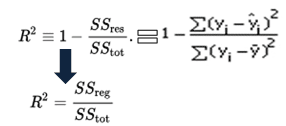

	* SSres is sum of residual(residual is also called as error i.e distance between actual and pred point) *or also called the sum of squared Errors i.e. SSE*, SStot is sum of average total(distance between actual and average)
    
	* Therefore SSres can be written as ∑(yi-ŷi)^2 and SStot can be written as ∑(yi-ȳi)^2; we are squaring as we may also have difference as negative points so to negate this we square
	* yi is original data point, ŷ is predicted data point, ȳ is average data point
    * Average data point is calculated by taking average of all original data point
	* Output of R-squared value is from 0 to 1. If value is near to or equal to 1 then it means line is best fitted to model.

* Can we get R-squared value less than 0? Yes when best fit line is worse than average best fit line(which contains average of all data points). So here actually SSres > SStot then only SSres/SStot will be > 1 so 1 - (value greater than 1) = negative value. Hence, in this case model needs to be discarded as it fitted very badly.

In [1]:
from sklearn.metrics import r2_score

y =[10, 20, 30]
f =[10, 20, 30]

print(r2_score(y, f))

y =[10, 20, 30]
f =[20, 25, 30]

print(r2_score(y, f))

1.0
0.375


## Adjusted R-squared:

* We know linear regression equation for single variable is y = Θ1 + Θ2x and for multiple linear regression it will be y = Θ1 + Θ2x1 + Θ3x2 + Θ4x3 + ....
* So as we go on adding more independent features may keep the r-squared value exactly the same or increase the r-squared value. It is called non-decreasing property of R square. This happens because:
    * We know SSres can be written as ∑(yi-ŷi)^2; where ŷi is predicted value
    * Let'a assume we have 2 variables and coefficient weight for them are: β0, β1. So for 2 features:
    * ŷi can be calculated as ŷi = β0 + β1x1 + β2x2
    * Then SSEres can be calcualted as
        * ∑(yi-ŷi)^2
        * ∑(i=1 to n) (yi - β1xi1 - β2xi2)
    * Let's say if one feature is added with some coefficient weight then eqn becomes
        * ŷi = β0 + β1x1 + β2x2 + β3x3
        * And SSEres can be calculated as ∑(i=1 to n) (yi - β1xi1 - β2xi2 - β3xi3)
    * Here we if have SSEres value as minimum then only R-squared value will be close to 1.
    * So if extra estimated coefficient(β3) is zero, the SSE and the R square will stay unchanged. Or if extra estimated coefficient(β3) takes a nonzero value, the SSE will reduce as we are subtracting. So in this case, the R square will increase, because it improves the quality of the fit.

* So therefore sometime if a feature is not correlated with the target output, but when we are adding such feature R-squared value is still increasing. That's why we use adjusted R-square.


* Formula for Adjusted R-squared value is:

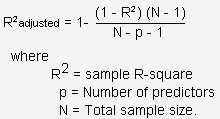

* Here actually `p` is number of independent features
* If in formula `p` is increased i.e a feature is added, then whole division (num/den) increases, then 1- divison result will give smaller number.
* So we can say whenever features increases then adjusted r-squared value decreases for uncorrelated features.
* As when we have correlated features then R² value will be increase then 1- R² will be smaller value, even though N-1/(N-p-1) may become bigger number , but we will be multiplying smaller with bigger i.e 1-R² * N-1/(N-p-1); therefore adjusted R² value will be high.
* But if not correlated then R² value will be less then if we mutiply slighly bigger number(1-R²) with smaller number(N-1/(N-p-1), then this multiplication will be give slightly bigger number and then 1- bigger number will give slight decreased value of  adjusted R².
* So if we don’t find a significant increase in R² then the value of the whole expression does not increase(may even decrease).

* Note: Adjusted R² value will always be less than or equal to R² value.

In [5]:
# Importing required libaries
from sklearn.linear_model import LinearRegression
import pandas as pd

# Reading the data
df = pd.read_csv("https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv")
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [20]:
# Fit linear regression model
linReg = LinearRegression()

# Filter out some independent features and also dependent feature
X, y = df[["mpg", "drat", "wt", "gear"]], df.hp

# Fit the model on these features
linReg.fit(X, y)

# .score returns the coefficient of determination of the prediction i.e. R-squared value
# Applying formula as given in above image
adj_r_squared_val = 1 - (1-linReg.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
adj_r_squared_val

0.6462491675381347

### If we increase a feature we can see if it's correlated then adj_r_squared_val will increase:

In [21]:
X, y = df[["mpg", "drat", "wt", "gear", "disp"]], df.hp

# Fit the model on these features
linReg.fit(X, y)

# .score returns the coefficient of determination of the prediction i.e. R-squared value
# Applying formula as given in above image
adj_r_squared_val = 1 - (1-linReg.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
adj_r_squared_val

0.7919852260002518

### If we increase a less meaningful feature we can see R-squared is only slighly increased:

**(which also means if there was feature which was not at all correlated with target variable then the value would have decreased)**

In [24]:
# Encoding model name feature from string to numeric as model takes numeric data
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df["model"] = label_encoder.fit_transform(df["model"])

X, y = df[["mpg", "drat", "wt", "gear", "model"]], df.hp

# Fit the model on these features
linReg.fit(X, y)

adj_r_squared_val = 1 - (1-linReg.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
adj_r_squared_val
# Here we can see it has increase slightly only

0.6463518348027933